# Chapter 6

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [34]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
PID_DB=np.loadtxt(url, delimiter=",")

X=PID_DB[:,0:8]
y=PID_DB[:,8]

In [ ]:
model=Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X,y, epochs=100, batch_size=16, verbose=0)

_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
#predictions=model.predict(X)
#rounded=[round(x[0]) for x in predictions]
#or:
predictions=model.predict_classes(X)

# Chapter 7

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [ ]:
#For single split only:
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)
# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=75, batch_size=10)

In [ ]:
X=PID_DB2[:,0:8]
y=PID_DB2[:,8]

kfold=StratifiedKFold(n_splits=5, shuffle=True)
cvscores=[]

for train, test in kfold.split(X,y):
    model=Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation = 'relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X[train], y[train], epochs=50, batch_size=10, verbose=0)
    scores=model.evaluate(X[test], y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1]*100)
    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

# Chapter 8

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [ ]:
def create_model():
    model=Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

X=PID_DB2[:,0:8]
y=PID_DB2[:,8]

model=KerasClassifier(build_fn=create_model, epochs=20, batch_size=10, verbose=0)
kfold=StratifiedKFold(n_splits=6, shuffle=True)
results=cross_val_score(model, X, y, cv=kfold)
print(results.mean())

In [ ]:
#Native integration of keras into sci-kit learn for grid search


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
import requests
import csv
import pandas as pd

url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
source=requests.get(url)
data=csv.reader(source.text.strip().split('\n'))
PID_DB=pd.DataFrame(data)

PID_DB2=PID_DB.to_numpy()
PID_DB2=PID_DB2.astype(np.float64)

X=PID_DB2[:,0:8]
y=PID_DB2[:,8]

In [ ]:
def create_model(optimizer='rmsprop', init='glorot_uniform'):
    model=Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer=init, activation='relu'))
    model.add(Dense(8, kernel_initializer=init, activation='relu'))
    model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

X=PID_DB2[:,0:8]
y=PID_DB2[:,8]

model=KerasClassifier(build_fn=create_model, verbose=0)

optimizers=['rmsprop', 'adam']
inits=['glorot_uniform', 'normal', 'uniform']
epochs=[20,25,30]
batches=[5,10,20]

param_grid=dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=inits)
grid=GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

grid_result=grid.fit(X,y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with : %r" % (mean, stdev, param))


# Chapter 9

In [11]:
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

In [7]:
url= 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data=pd.read_csv(url, header=None)
dataset=data.values
X=dataset[:,0:4].astype(float)
Y=dataset[:,4]

In [ ]:
encoder=LabelEncoder()
encoder.fit(Y)
encoded_Y=encoder.transform(Y)
dummy_y=np_utils.to_categorical(encoded_Y)

In [18]:
def baseline_model():
    model=Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [19]:
estimator=KerasClassifier(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold=KFold(n_splits=10, shuffle=True)
results=cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 95.33% (8.46%)


# Chapter 10

In [2]:
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

In [3]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'
data=pd.read_csv(url, header=None)
dataset=data.values
X=dataset[:,0:60].astype(float)
Y=dataset[:,60]

In [23]:
encoder=LabelEncoder()
encoder.fit(Y)
encoded_Y=encoder.transform(Y)

In [25]:
def create_baseline():
    model=Sequential()
    model.add(Dense(60, input_dim=60, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [26]:
estimator=KerasClassifier(build_fn=create_baseline, epochs=50, batch_size=5, verbose=0)
kfold=StratifiedKFold(n_splits=10, shuffle=True)
results=cross_val_score(estimator, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 79.79% (7.44%)


Repeat with Standardization Pipeline

In [28]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'
data=pd.read_csv(url, header=None)
dataset=data.values
X=dataset[:,0:60].astype(float)
Y=dataset[:,60]

encoder=LabelEncoder()
encoder.fit(Y)
encoded_Y=encoder.transform(Y)

def create_baseline():
    model=Sequential()
    model.add(Dense(60, input_dim=60, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimators=[]
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=50, batch_size=5, verbose=0)))
pipeline=Pipeline(estimators)

kfold=StratifiedKFold(n_splits=10, shuffle=True)
results=cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 87.05% (7.04%)


# Chapter 11

In [4]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [11]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data'
data=pd.read_csv(url, delim_whitespace=True, header=None)
dataset=data.values
X=dataset[:,0:13]
Y=dataset[:,13]

In [13]:
def baseline_model():
    model=Sequential()
    model.add(Dense(13, input_dim=13, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

estimator=KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)
kfold=KFold(n_splits=6)
results=cross_val_score(estimator,X,Y,cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -48.86 (15.69) MSE


Repeat with scaled inputs

In [14]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [15]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data'
data=pd.read_csv(url, delim_whitespace=True, header=None)
dataset=data.values
X=dataset[:,0:13]
Y=dataset[:,13]

In [ ]:
def baseline_model():
    model=Sequential()
    model.add(Dense(13, input_dim=13, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

estimators=[]
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline=Pipeline(estimators)

kfold=KFold(n_splits=5)
results=cross_val_score(pipeline,X,Y,cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

# Chapter 12: Save/Load

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy as np

In [7]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
PID_DB2=np.loadtxt(url, delimiter=",")

X=PID_DB2[:,0:8]
y=PID_DB2[:,8]

In [8]:
model=Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.fit(X,y, epochs=50, batch_size=10, verbose=0)
scores=model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 72.53%


In [11]:
#Save model, weights:

model_json=model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")

In [12]:
#Now to load:

json_file=open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")

loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score=loaded_model.evaluate(X,y,verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 72.53%


In [ ]:
#More efficient save:
model.save("model.h5")

#More efficient load:
from keras.models import load_model
model=load_model('model.h5')

In [ ]:
#Yaml:
#Save:
from keras.models import model_from_yaml
model_yaml=model.to_yaml()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
model.save_weights("model.h5")
#Load:
yaml_file=open('model.yaml', 'r')
loaded_model_yaml=yaml_file.read()
yaml_file.close()
loaded_model=model_from_yaml(loaded_model_yaml)
loaded_model.load_weights("model.h5")
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Chapter 13: Checkpointing

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import numpy as np

In [14]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
dataset=np.loadtxt(url, delimiter=",")
X=dataset[:,0:8]
Y=dataset[:,8]

In [ ]:
model=Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Checkpoint:
#option 1, multiple files with new best score weights:
#filepath="weights-improvement-{epoch:02d}--{val_accuracy:.2f}.hdf5"

#option 2, single file updated with best score weights:
filepath="weights.best.hdf5"
checkpoint=ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list=[checkpoint]

model.fit(X,Y, validation_split=0.33, epochs=50, batch_size=10, callbacks=callbacks_list, verbose=0)

In [20]:
#load weights from checkpoint:

model=Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.load_weights("weights.best.hdf5")

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

scores=model.evaluate(X,Y, verbose=0)
print("%s: %2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 70.052081%


# Chapter 14: Metric Plotting

In [22]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

In [23]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
dataset=np.loadtxt(url, delimiter=",")
X=dataset[:,0:8]
Y=dataset[:,8]

In [25]:
model=Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X,Y, validation_split=0.33, epochs=50, batch_size=10, verbose=0)
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


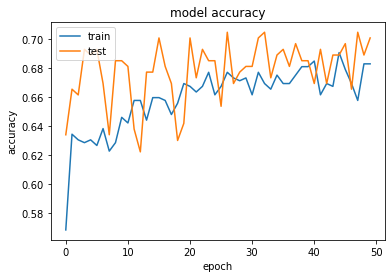

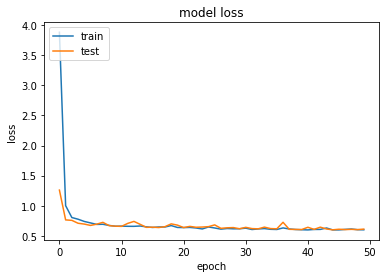

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Chapter 15: Dropout Regularization

In [6]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline

In [2]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'
dataframe=read_csv(url, header=None)
dataset=dataframe.values
X=dataset[:,0:60].astype(float)
Y=dataset[:, 60]

In [3]:
encoder=LabelEncoder()
encoder.fit(Y)
encoded_Y=encoder.transform(Y)

In [4]:
#Generate baseline model for performance benchmark:
def create_baseline():
    model=Sequential()
    model.add(Dense(60, input_dim=60, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    sgd=SGD(lr=0.01, momentum=0.8)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

estimators=[]
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=16, verbose=0)))
pipeline=Pipeline(estimators)
kfold=StratifiedKFold(n_splits=10, shuffle=True)

In [5]:
results=cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 85.57% (6.43%)


In [7]:
#Repeate performance with dropout applied on input layer:
#includes kernel_costraint to set max weight normalization at 3
#learning rate modified to .1 from .01
def create_model():
    model=Sequential()
    model.add(Dropout(0.2, input_shape=(60,)))
    model.add(Dense(60, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dense(30, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dense(1, activation='sigmoid'))
    sgd=SGD(lr=0.1, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

estimators=[]
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=100, batch_size=16, verbose=0)))
pipeline=Pipeline(estimators)
kfold=StratifiedKFold(n_splits=10, shuffle=True)

In [8]:
results=cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 86.50% (6.06%)


In [9]:
#Repeate performance with dropout applied on hidden layers:
def create_model():
    model=Sequential()
    model.add(Dense(60, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(30, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    sgd=SGD(lr=0.1, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

estimators=[]
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=100, batch_size=16, verbose=0)))
pipeline=Pipeline(estimators)
kfold=StratifiedKFold(n_splits=10, shuffle=True)

In [ ]:
results=cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# Chapter 16

In [22]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder

In [23]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
dataframe=read_csv(url, header=None)
dataset=dataframe.values
X=dataset[:,0:34].astype(float)
Y=dataset[:,34]

encoder=LabelEncoder()
encoder.fit(Y)
Y=encoder.transform(Y)

In [24]:
model=Sequential()
model.add(Dense(34, input_dim=34, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

epochs=50
learning_rate=0.1
decay_rate=learning_rate/epochs
momentum=0.8
sgd=SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
history=model.fit(X,Y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)

In [30]:
#Another learning rate option, change based on epoch number

from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import LearningRateScheduler

In [31]:
def step_decay(epoch):
    initial_lrate=0.1
    drop=0.5
    epochs_drop=10.0
    lrate=initial_lrate*math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

In [ ]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
dataframe=read_csv(url, header=None)
dataset=dataframe.values
X=dataset[:,0:34].astype(float)
Y=dataset[:,34]

encoder=LabelEncoder()
encoder.fit(Y)
Y=encoder.transform(Y)

model=Sequential()
model.add(Dense(34, input_dim=34, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

sgd=SGD(lr=0.0, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
lrate=LearningRateScheduler(step_decay)
callbacks_list=[lrate]
model.fit(X,Y,validation_split=0.33, epochs=50, batch_size=28, callbacks=callbacks_list, verbose=2)